In [64]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

In [65]:
def join_mask( mask_list,combineor=False ):
    full_mask = None
    for m in mask_list:
        if full_mask is None:
            full_mask = m
        else:
            if combineor:
                full_mask = full_mask | m
            else:
                full_mask = full_mask & m
    return full_mask

In [80]:
resultdir = "/data/mtmoore/school/CSiML_AI395T/final_project/models/yolo11/iterative/validation"
resultre = re.compile(r'^.+\/(?P<modelname>[^_]+)_(?P<imgsz>[\d]+)imgsz_(?P<camera>[^_]+)_(?P<epochs>[^-]+?)(epochs)?-val$')
metricre = re.compile(r'^(?P<category>category)?_*(?P<metric>metrics/)?(?P<name>[^(]*).*?$')

model_parent = "yolov"
val_results = []

plot_metrics = ['Precision', 'Recall', 'mAP50', 'mAP50-95', ]

for valresult in glob.glob(f"{resultdir}/*-val"):
    
    match = resultre.match(valresult)
    if match is None:
        print(F"didn't match directory name {valresult}")
        continue
    params = match.groupdict()
    new_result = params.copy()
    new_result['modelname'] = f"{model_parent}{new_result['modelname']}"
    if new_result['epochs'] == "best":
        new_result['epochs'] = 150
    
    if not os.path.exists(f"{valresult}/metrics.json"):
        print(f"{valresult}/metrics.json doesn't exist right now, skipping")
        continue
    with open(f"{valresult}/metrics.json") as r:
        metrics = json.load(r)
        for k, v in metrics.items():
            kmatch = metricre.match(k)
            if kmatch is not None:
                md = kmatch.groupdict()
                if md['metric'] is not None:
                    k = md['name']
                    new_result[ md['name'] ] = v
                elif md['category'] is not None:
                    if len(v) == 0:
                        new_result[ f"{md['category']}_{md['name']}" ] = 0
                    else:
                        new_result[ f"{md['category']}_{md['name']}" ] = v[0]
                else:
                    new_result[ k ] = v
        # skip one weird data point
        if float(new_result['mAP50-95']) < 0.001 and  new_result['epochs'] == 150:
            continue
        val_results.append(new_result.copy())

/data/mtmoore/school/CSiML_AI395T/final_project/models/yolo11/iterative/validation/11l_736imgsz_IP8M-H-SW_best-val/metrics.json doesn't exist right now, skipping
/data/mtmoore/school/CSiML_AI395T/final_project/models/yolo11/iterative/validation/11m_3840imgsz_IP8M-H-SW_18epochs-val/metrics.json doesn't exist right now, skipping


In [81]:
val_df = pd.DataFrame(val_results)
print(val_df.dtypes)
val_df = val_df.astype({'imgsz': 'int', 'epochs':'int',
                        'precision': 'float', 'recall': 'float', 
                        'mAP50': 'float', 'mAP50-95': 'float',
                       })
val_df.rename(columns={'imgsz': "Image Size (px)", 'epochs': 'Epochs',
                       'precision': 'Precision', 'recall': 'Recall',
                       'camera': 'Camera', 'modelname': 'Model Name',
                      }, inplace=True)

mask = [] 
for m in plot_metrics:
    mask.append( (val_df[m] < 0.001) )

val_df.drop(val_df[ join_mask(mask, combineor=True) ].index, inplace=True)
val_df.dtypes

display(val_df[ (val_df['Camera']=="IP8M-H-NW") & (val_df["Image Size (px)"] == 736) & ( val_df['Model Name'] == "yolov11n") ].sort_values(['Epochs']))

modelname             object
imgsz                 object
camera                object
epochs                object
precision            float64
recall               float64
mAP50                float64
mAP50-95             float64
fitness              float64
category_mAP50-95    float64
dtype: object


,Model Name,Image Size (px),Camera,Epochs,Precision,Recall,mAP50,mAP50-95,fitness,category_mAP50-95
1526,yolov11n,736,IP8M-H-NW,3,0.726255,0.601015,0.662047,0.266894,0.306409,0.266894
1230,yolov11n,736,IP8M-H-NW,4,0.771679,0.637540,0.697756,0.294575,0.334893,0.294575
1333,yolov11n,736,IP8M-H-NW,5,0.890946,0.653722,0.752594,0.342633,0.383629,0.342633
997,yolov11n,736,IP8M-H-NW,6,0.866695,0.694347,0.736391,0.313767,0.356029,0.313767
1147,yolov11n,736,IP8M-H-NW,7,0.811354,0.668112,0.747996,0.339315,0.380183,0.339315
878,yolov11n,736,IP8M-H-NW,8,0.879155,0.708738,0.779914,0.372116,0.412896,0.372116
774,yolov11n,736,IP8M-H-NW,9,0.898185,0.682848,0.794671,0.377812,0.419497,0.377812
3678,yolov11n,736,IP8M-H-NW,10,0.767669,0.682848,0.741262,0.314325,0.357018,0.314325
3597,yolov11n,736,IP8M-H-NW,11,0.804949,0.705502,0.771493,0.307254,0.353678,0.307254
3508,yolov11n,736,IP8M-H-NW,12,0.860532,0.718851,0.790321,0.373860,0.415506,0.373860


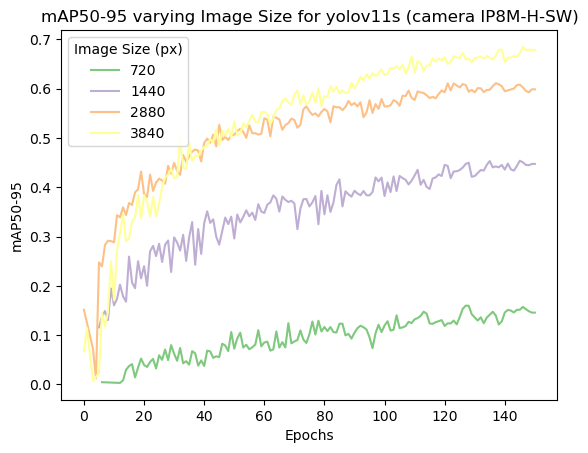

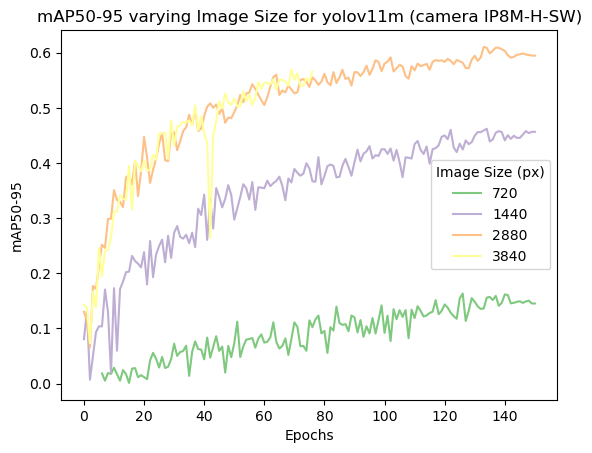

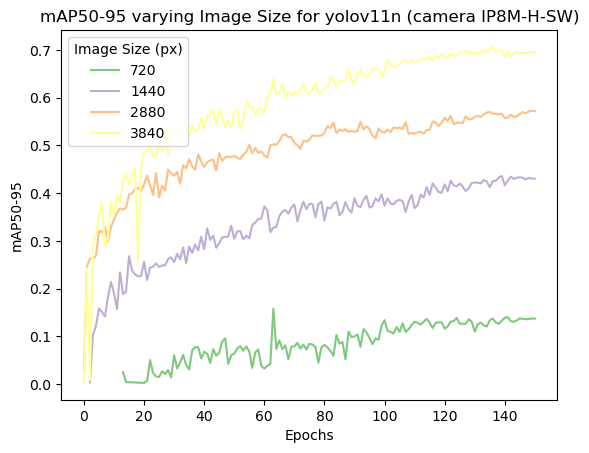

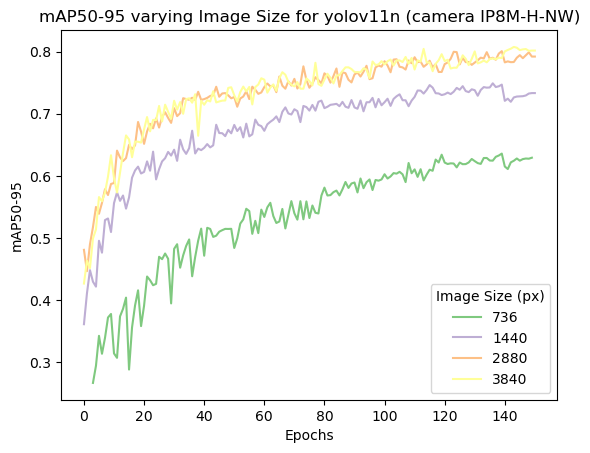

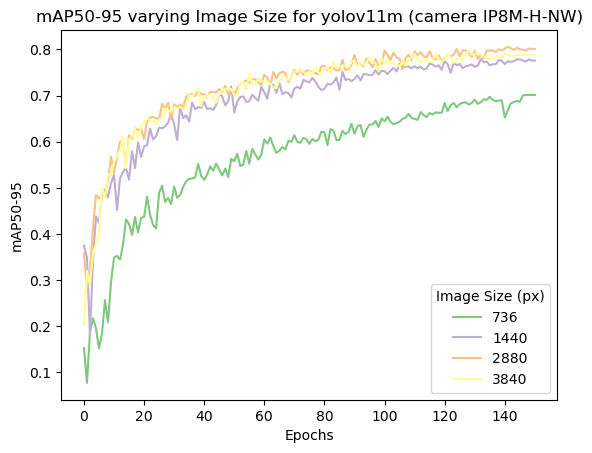

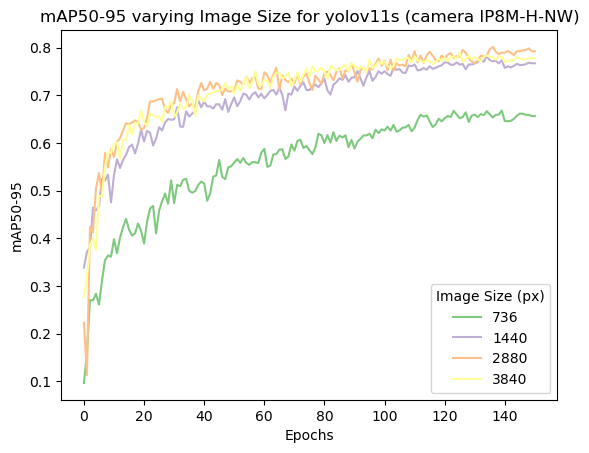

In [82]:
# iterate over cameras
mask_list = []
for camera in val_df['Camera'].unique().tolist():
    mask_list.append(val_df['Camera'] == camera) 
    
    # iterate over model
    for model in val_df[join_mask( mask_list )]['Model Name'].unique().tolist(): 
        mask_list.append((val_df['Model Name'] == model))

        current_df = val_df[ join_mask( mask_list ) ]
        #display(current_df)
        for metric in ['mAP50-95']: #plot_metrics:
            fig = plt.figure()
            axs = sns.lineplot(data=current_df, x='Epochs', y=metric, hue='Image Size (px)', palette='Accent' )
            axs.set_title(f"{metric} varying Image Size for {model} (camera {camera})") 
            #plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_camera_model_{camera}_{model}_{metric}.png"))
        mask_list.pop()
    mask_list.pop()

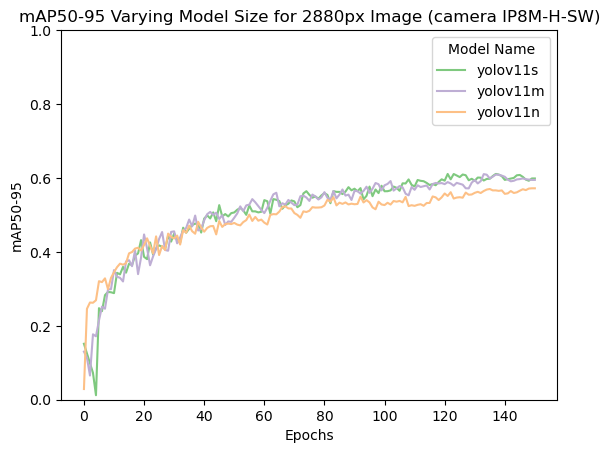

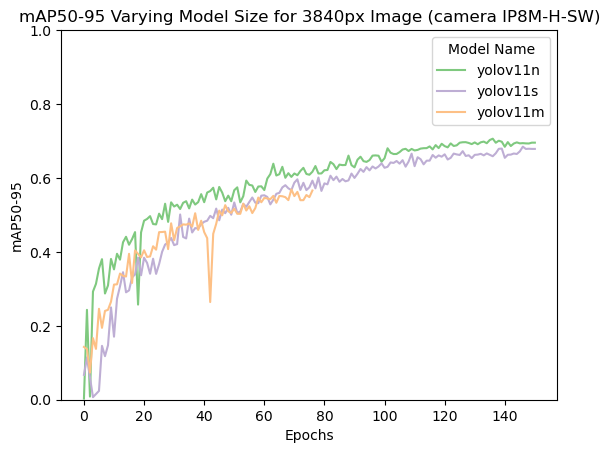

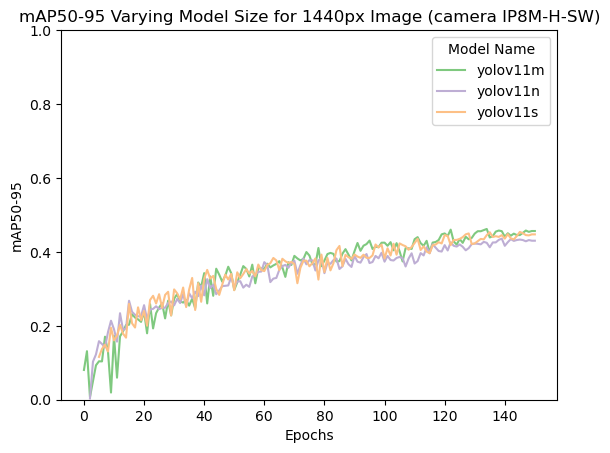

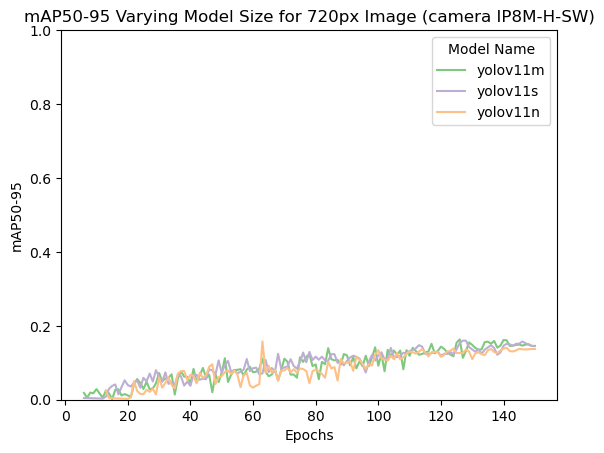

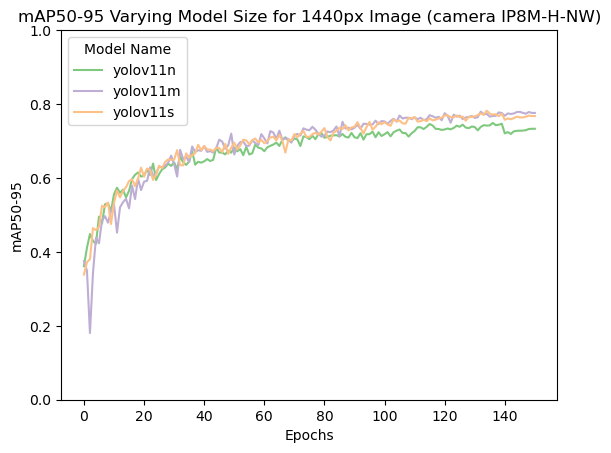

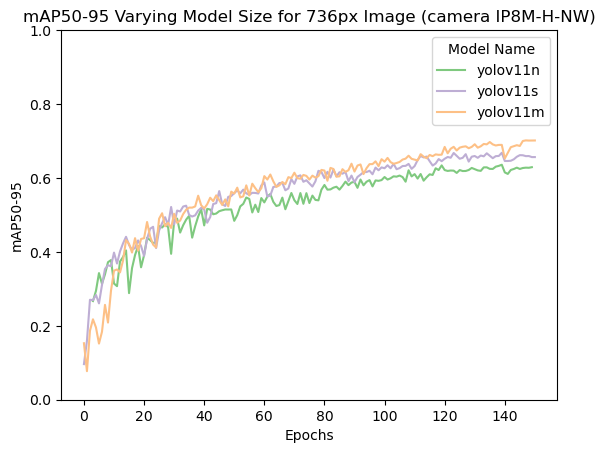

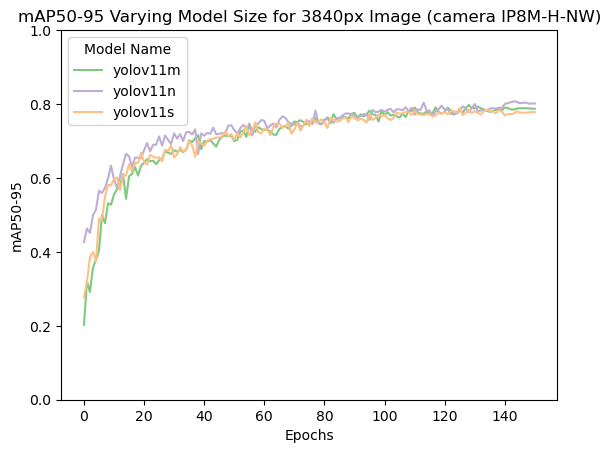

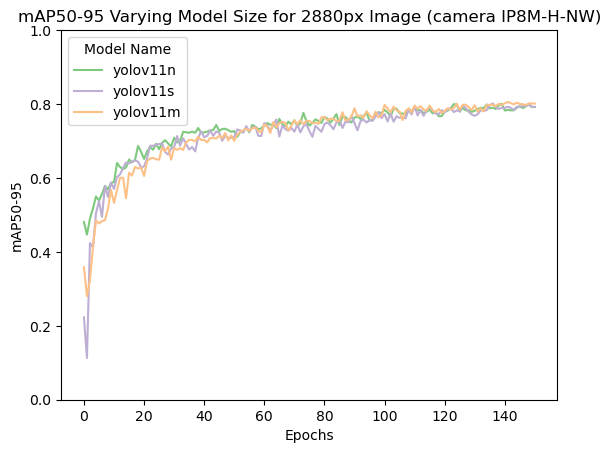

In [83]:
# iterate over cameras
mask_list = []
for camera in val_df['Camera'].unique().tolist():
    mask_list.append(val_df['Camera'] == camera) 
    
    # iterate over model
    for imagesize in val_df[join_mask( mask_list )]['Image Size (px)'].unique().tolist(): 
        mask_list.append((val_df['Image Size (px)'] == imagesize))

        current_df = val_df[ join_mask( mask_list ) ]
        #display(current_df)
        for metric in ['mAP50-95']: #plot_metrics
            fig = plt.figure()
            axs = sns.lineplot(data=current_df, x='Epochs', y=metric, hue='Model Name', palette='Accent' )
            axs.set_title(f"{metric} Varying Model Size for {imagesize}px Image (camera {camera})") 
            axs.set_ylim([0,1])
            #plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_camera_model_{camera}_{imagesize}px_{metric}.png"))
            plt.show()
            plt.close()
        mask_list.pop()
    mask_list.pop()

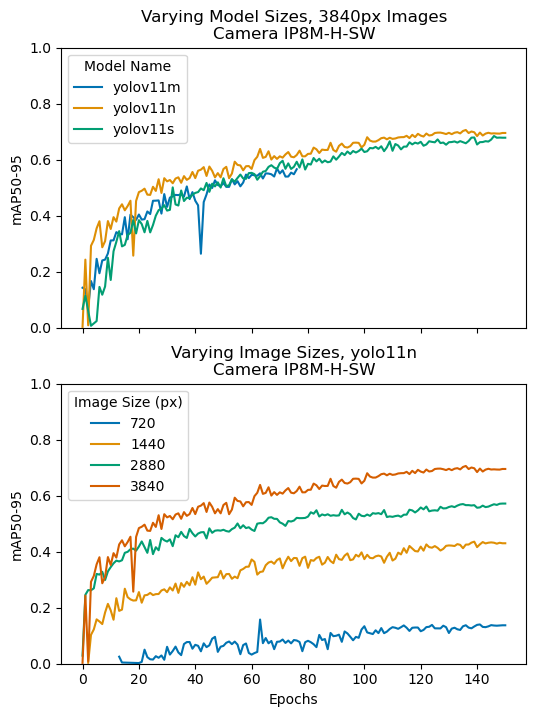

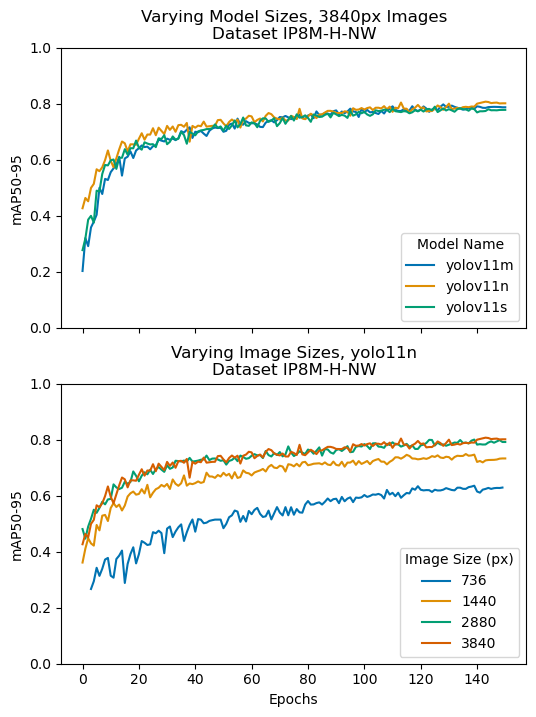

In [94]:
#params
pd.set_option('display.max_rows', 500)

model="yolov11n"
imagesize=3840
metric="mAP50-95"
camera="IP8M-H-SW"
val_df.sort_values(['Epochs', 'Model Name', 'Image Size (px)'], inplace=True)


model_img_df = val_df[(val_df['Camera']==camera) & (val_df['Image Size (px)'] == imagesize) & ((val_df['Model Name'] == model))] 

#display(vary_model_df)
#display(vary_image_df)
#display(model_img_df)
#fig, axs = plt.matplotlib.pyplot.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,8))

#sp1 = sns.lineplot(data=vary_model_df, x='Epochs', y=metric, hue='Model Name', palette='Accent', ax=axs[0])
#axs[0].set_title(f"{metric} Varying Model Size for 3840px Images (camera {camera})") 

#sp2 = sns.lineplot(data=vary_image_df, x='Epochs', y=metric, hue='Image Size (px)', palette='Accent', ax=axs[1] )
#axs[1].set_title(f"{metric} Varying Image Size for model yolo11n (camera {camera})") 

#plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_camera_model_{camera}_{imagesize}px_{metric}.png"))
#plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_single_camera_model_{camera}_{metric}_vary_model_imgsize.png"))



camera="IP8M-H-SW"
vary_model_df = val_df[(val_df['Camera']==camera) & (val_df['Image Size (px)'] == imagesize)] 
vary_image_df = val_df[(val_df['Camera']==camera) & (val_df['Model Name'] == model)]

fig, axs = plt.matplotlib.pyplot.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(6,8))
axs[0] = sns.lineplot(data=vary_model_df, x='Epochs', y=metric, hue='Model Name', palette='colorblind', ax=axs[0] )
axs[0].set_title(f"Varying Model Sizes, {imagesize}px Images\nCamera {camera}") 
axs[0].set_ylim([0,1])
plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_camera_model_{camera}_{imagesize}px_vary_model_{metric}.png"))

axs[1] = sns.lineplot(data=vary_image_df, x='Epochs', y=metric, hue='Image Size (px)', palette='colorblind', ax=axs[1])
axs[1].set_title(f"Varying Image Sizes, yolo11n\nCamera {camera}")
axs[1].set_ylim([0,1])
plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_vary_image_model_{camera}_{metric}.png"))



camera="IP8M-H-NW"
vary_model_df = val_df[(val_df['Camera']==camera) & (val_df['Image Size (px)'] == imagesize)] 
vary_image_df = val_df[(val_df['Camera']==camera) & (val_df['Model Name'] == model)]

fig, axs = plt.matplotlib.pyplot.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(6,8))
axs[0] = sns.lineplot(data=vary_model_df, x='Epochs', y=metric, hue='Model Name', palette='colorblind', ax=axs[0] )
axs[0].set_title(f"Varying Model Sizes, {imagesize}px Images\nDataset {camera}") 
axs[0].set_ylim([0,1])


axs[1] = sns.lineplot(data=vary_image_df, x='Epochs', y=metric, hue='Image Size (px)', palette='colorblind', ax=axs[1])
axs[1].set_title(f"Varying Image Sizes, yolo11n\nDataset {camera}") 
axs[1].set_ylim([0,1])
plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"validation_vary_image_model_{camera}_{metric}.png"))
